<a href="https://colab.research.google.com/github/Nouhaila2002/sentiment_analysis/blob/main/NLP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sentiment Analysis using a state-od-the-art model that is called Bert**

Install and Import Dependencies

In [1]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 5.2 MB/s 
     |████████████████████████████████| 120 kB 49.5 MB/s 
     |████████████████████████████████| 6.6 MB 49.3 MB/s 


In [6]:
!pip install BeautifulSoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer 
import torch
import requests
from bs4 import BeautifulSoup
import re

Instantiate Model

In [11]:
# https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment

# load a pre-trained nlp model
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

# create our model and load a pre-trained nlp model
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

**Encode and Calculate Sentiment**

In [17]:
# encoded string
tokens = tokenizer.encode('I hate this, absolutely the worst', return_tensors='pt')
tokens

tensor([[  101,   151, 39487, 10372,   117, 35925, 10563, 10103, 43060,   102]])

In [16]:
tokenizer.decode(tokens[0]) # we can pass to this method a list a list of lists

'[CLS] i hate this, absolutely the worst [SEP]'

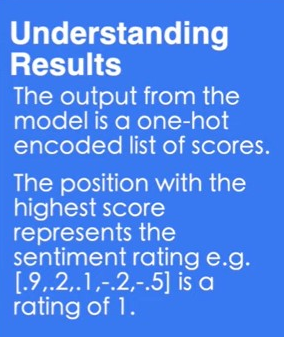

In [18]:
result = model(tokens)
int(torch.argmax(result.logits))+1

1

In [19]:
tokens = tokenizer.encode('This is amazing, I loved it. GREAT!', return_tensors='pt')
result = model(tokens)
int(torch.argmax(result.logits))+1

5

Collect Reviews

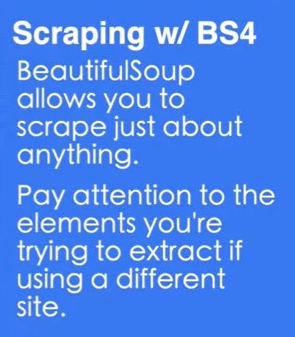

In [20]:
r = requests.get('https://www.yelp.com/biz/mejico-sydney-2')
soup = BeautifulSoup(r.text, 'html.parser')
regex = re.compile('.*comment.*')
results = soup.find_all('p', {'class':regex})
reviews = [result.text for result in results]

In [21]:
reviews

['The food is fresh and tasty. \xa0The scallop ceviche started the lunch. The scallops were tender with a great acidity and use of mango and peppers. The steak was tender and I got the hint of tequila in the sauce. I enjoyed a watermelon salad that complimented the the steak. The portions are good, but a stretch if you are sharing. My only down point is the service. They really only showed up to present my next plate and never checked to see if I wanted another drink (which I did).Enjoyed the food.',
 "Don't come here expecting legit Mexican food but a modern twist on some staples. Loud party area, fun drinks and friendly staff make this a hip meeting area for large groups. Drinks were better than the food. They stuff the families toward the back but lack any amenities (no changing table) except a high chair. Service started off friendly but it took a while to get someone to take our order and then they forgot our dish which came out cold when we asked for it. Then we had to flag someo

Load Reviewws into DataFrame and Score them

In [22]:
import numpy as np
import pandas as pd

In [23]:
# dataFrame makes it easier to go through and process your views that way
df = pd.DataFrame(np.array(reviews), columns=['review'])
df.head()

,review
0,The food is fresh and tasty. The scallop cevi...
1,Don't come here expecting legit Mexican food b...
2,Out of all the restaurants that I tried in Syd...
3,We came here on a Thursday night @ 5pm and by ...
4,I was pleasantly surprised at what a great job...


In [26]:
df['review'].iloc[0]

'The food is fresh and tasty. \xa0The scallop ceviche started the lunch. The scallops were tender with a great acidity and use of mango and peppers. The steak was tender and I got the hint of tequila in the sauce. I enjoyed a watermelon salad that complimented the the steak. The portions are good, but a stretch if you are sharing. My only down point is the service. They really only showed up to present my next plate and never checked to see if I wanted another drink (which I did).Enjoyed the food.'

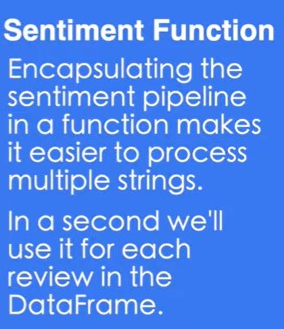

In [27]:
# sentiment pipeline
def sentiment_score(review):
  tokens = tokenizer.encode(review, return_tensors='pt')
  result = model(tokens) #calculate sentiment 
  return int(torch.argmax(result.logits))+1

In [28]:
# nlp pipeline is actually limited as to how much text or how many tokens you can pass through to it at one particular time and in 
# this case is limited to 512 tokens

df['sentiment'] = df['review'].apply(lambda x: sentiment_score(x[:512]))

In [29]:
df

,review,sentiment
0,The food is fresh and tasty. The scallop cevi...,4
1,Don't come here expecting legit Mexican food b...,3
2,Out of all the restaurants that I tried in Syd...,5
3,We came here on a Thursday night @ 5pm and by ...,4
4,I was pleasantly surprised at what a great job...,5
5,Have been here twice and have absolutely loved...,5
6,Really nice (upmarket) Mexican restaurant. Goo...,4
7,If you're looking for a quiet little romantic ...,2
8,The service at this place was top notch - the ...,5
9,Ordered feed me for $59 along with that.. Food...,2
